# Day9. 심화과제


Req-7. 명세서 9p의 내용을 따라 Face Detection을 하는 코드를 작성하고 실행해 보세요.

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 98kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=7faabf0d6ff00faf56cdcdb28969dda7f88ea6fe771bacf11a6551fedc74b3cf
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


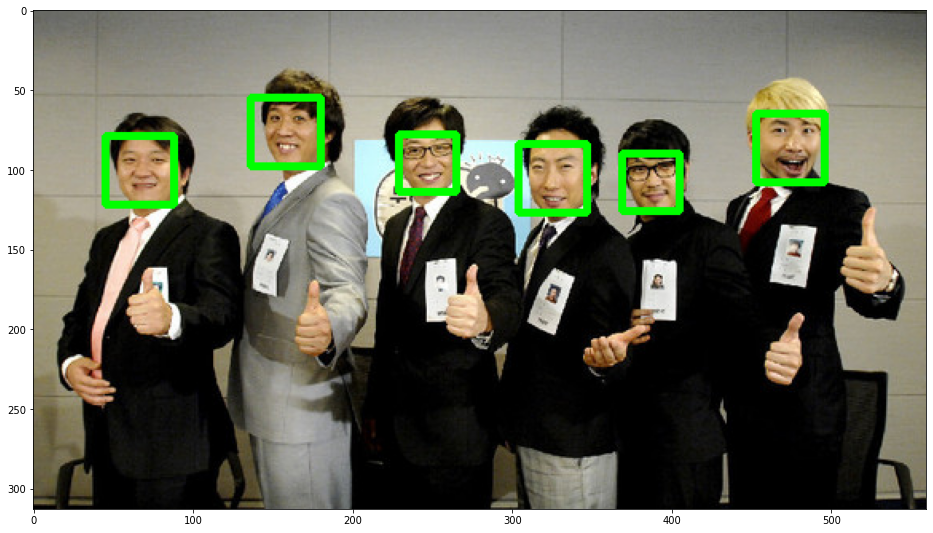

In [5]:
import cv2, os
import face_recognition as fr
from IPython.display import Image, display
from matplotlib import pyplot as plt

image_path = "/gdrive/My Drive/colab/mudo.jpg"
image = fr.load_image_file(image_path)
face_locations = fr.face_locations(image)

for(top,right,bottom,left) in face_locations:
  cv2.rectangle(image, (left,top), (right,bottom), (0,255,0), 3)
#이미지 버퍼 출력
plt.rcParams["figure.figsize"] = (16,16)
plt.imshow(image)
plt.show()

Req-8. 명세서 12p를 참고하여 4명의 인물사진에서 얼굴을 감지하여 인코딩을 한 후 새로운 인물사진 unknown을 입력 받아 기존 4명의 얼굴 중 동일인을 찾는 코드를 구현 및 실행해 보세요.


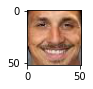

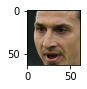

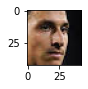

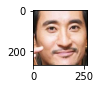

In [13]:
plt.rcParams["figure.figsize"] = (1,1)

# 이미지 파일을 로드하여 known_person_list 리스트 생성
known_person_list = []
known_person_list.append(fr.load_image_file("/gdrive/My Drive/colab/zlt.jfif"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/colab/zlt2.jfif"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/colab/zlt3.jfif"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/colab/shj.jfif"))

# 얼굴을 인식을 하여 감지된 부분을 잘라낸 다음 known_face_list에 저장
known_face_list = []
for person in known_person_list:

# 얼굴좌표를 알아내서 잘라낸다
  top, right, bottom, left = fr.face_locations(person)[0]
  face_image = person[top:bottom, left:right]

# known_face_list에 잘라낸 face_image를 저장
  known_face_list.append(face_image)

# known_face_list에 저장된 얼굴들 출력
for face in known_face_list:
  plt.imshow(face)
  plt.show()


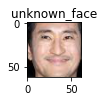

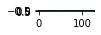

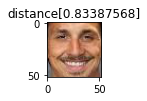

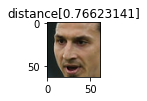

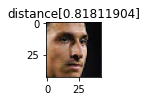

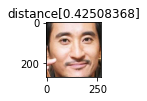

In [27]:
unknown_person = fr.load_image_file("/gdrive/My Drive/colab/unknown.jfif")

top, right, bottom, left = fr.face_locations(unknown_person)[0]
unknown_face = unknown_person[top:bottom, left:right]
plt.title("unknown_face")
plt.imshow(unknown_face)
plt.show()
# unknown_person_face를 인코딩
enc_unknown_face = fr.face_encodings(unknown_face)

# 화면에 표시
plt.imshow(enc_unknown_face)
plt.show()

for face in known_face_list:
  enc_known_face = fr.face_encodings(face)
  distance = fr.face_distance(enc_known_face,enc_unknown_face[0])
  plt.title("distance" + str(distance))
  plt.imshow(face)
  plt.show()